## 数据导入

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

batch_size=256

d2l.use_svg_display()
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=4)
test_iter = data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=4)

## 网络构建

In [2]:
from torch.nn import Parameter

input = 28*28
output = 10
hidden_layer_nodes = 256

W_1 = Parameter(torch.normal(0,0.01,(input,hidden_layer_nodes),requires_grad=True))
b_1 = Parameter(torch.zeros(hidden_layer_nodes,requires_grad=True))
W_2 = Parameter(torch.normal(0,0.01,(hidden_layer_nodes,output),requires_grad=True))
b_2 = Parameter(torch.zeros(output,requires_grad=True))
parameters = (W_1,b_1,W_2,b_2)

In [3]:
def relu(X):
    zeros = torch.zeros_like(X)
    return torch.max(zeros,X)

In [4]:
def net(X,W_1,b_1,W_2,b_2):
    X = X.reshape((-1,input))
    Hidden = relu(torch.matmul(X,W_1) + b_1)
    Output = torch.matmul(Hidden,W_2) + b_2
    return Output

In [5]:
loss = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(parameters,lr=0.05)

## 训练

In [6]:
epochs = 10

for epoch in range(epochs):
    for X,y in train_iter:
        l = loss(net(X,W_1,b_1,W_2,b_2),y)
        optim.zero_grad()
        l.backward()
        optim.step()
    with torch.no_grad():
        print(f"epoch{epoch+1}    test_acc {d2l.evaluate_accuracy_gpu(lambda X:net(X,W_1,b_1,W_2,b_2),iter(test_iter))}") 

epoch1    test_acc 0.6579
epoch2    test_acc 0.7522
epoch3    test_acc 0.7951
epoch4    test_acc 0.8061
epoch5    test_acc 0.8117
epoch6    test_acc 0.7693
epoch7    test_acc 0.8267
epoch8    test_acc 0.8245
epoch9    test_acc 0.8258
epoch10    test_acc 0.8363


array([<Axes: title={'center': 'coat\npullover'}>,
       <Axes: title={'center': 'sneaker\nsneaker'}>,
       <Axes: title={'center': 'coat\ncoat'}>,
       <Axes: title={'center': 'trouser\ntrouser'}>,
       <Axes: title={'center': 'sandal\nsandal'}>,
       <Axes: title={'center': 'pullover\npullover'}>], dtype=object)

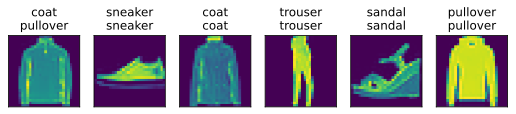

In [7]:
n = 6
preds = d2l.get_fashion_mnist_labels(net(X,W_1,b_1,W_2,b_2).argmax(1))
trues = d2l.get_fashion_mnist_labels(y)
titles = [pred + "\n" + true for pred,true in zip(preds,trues)]
images = X[0:6].reshape((n,28,28))
d2l.show_images(images,1,n,titles=titles)